In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

In [ ]:
url = "https://raw.githubusercontent.com/KristinaStepanovich/Project/main/The_nidus_of_Dutch_elm_disease.csv"
df = pd.read_csv(url)
df.head()
# просмотр датафрейма

,Порядковый номер,Идентификационный номер,Классификация очагов,Год обследования,"Периметр территории очагов,м","Площадь территории очагов,м2"
0,1464,1,Действующий очаг,2017,17.840530,11.855066
1,1465,2,Возникающий очаг,2017,47.601830,175.242859
2,1466,3,Действующий очаг,2017,48.658123,95.710403
3,1467,4,Действующий очаг,2017,239.168655,595.867127
4,1468,5,Без признаков поражения,2016,1829.541016,3685.098633


In [ ]:
# проверяем отрицательные значения
df[df['Площадь территории очагов,м2'] < 0]

,Порядковый номер,Идентификационный номер,Классификация очагов,Год обследования,"Периметр территории очагов,м","Площадь территории очагов,м2"
200,1699,201,Действующий очаг,2017,94.086380,-293.949188
201,1700,202,Действующий очаг,2017,196.579117,-1412.491821
392,1954,393,Затухающий очаг,2017,213.583282,-6341.792969
411,2007,412,Действующий очаг,2017,79.326340,-397.736572
423,2019,424,Затухающий очаг,2017,593.938660,-25939.234375
...,...,...,...,...,...,...
2218,3853,2219,Действующий очаг,2017,205.306900,-2012.946777
2221,3856,2222,Действующий очаг,2017,417.890320,-36852.847656
2233,3868,2234,Без признаков поражения,2017,291.452728,-1303.706543
2236,3871,2237,Без признаков поражения,2017,177.443848,-411.102264


In [ ]:
# убираем отрицательные значения
# конвертер вернет модуль числа
converter = lambda x: math.fabs(x)
df['Площадь территории очагов,м2'] = df['Площадь территории очагов,м2'].apply(converter)

In [ ]:
# проверка на отрицательные значения
df[df['Площадь территории очагов,м2'] < 0]

,Порядковый номер,Идентификационный номер,Классификация очагов,Год обследования,"Периметр территории очагов,м","Площадь территории очагов,м2"


In [ ]:
# проверка nan значений
df.info()
# количество строчек везде одинаково, поэтому nan значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Порядковый номер              2414 non-null   int64  
 1   Идентификационный номер       2414 non-null   int64  
 2   Классификация очагов          2414 non-null   object 
 3   Год обследования              2414 non-null   int64  
 4   Периметр территории очагов,м  2414 non-null   float64
 5   Площадь территории очагов,м2  2414 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 113.3+ KB


In [ ]:
# проверка категориальных признаков - Классификация очагов
df['Классификация очагов'].value_counts()

Действующий очаг           671
Возникающий очаг           653
Без признаков поражения    628
Не определено              236
Затухающий очаг            137
Вырублено                   89
Name: Классификация очагов, dtype: int64

In [ ]:
# преобразование категориальных признаков
encoder = LabelEncoder()
df['Классификация очагов'] = encoder.fit_transform(df['Классификация очагов'])
df.head()

,Порядковый номер,Идентификационный номер,Классификация очагов,Год обследования,"Периметр территории очагов,м","Площадь территории очагов,м2"
0,1464,1,3,2017,17.840530,11.855066
1,1465,2,1,2017,47.601830,175.242859
2,1466,3,3,2017,48.658123,95.710403
3,1467,4,3,2017,239.168655,595.867127
4,1468,5,0,2016,1829.541016,3685.098633


In [ ]:
# создание тренировочных и тестовых выборок
# признаки столбцы Классификация очагов, Периметр территории очагов,м
X = df.loc[:, ['Классификация очагов', 'Периметр территории очагов,м']].values
Y = df['Площадь территории очагов,м2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [ ]:
# модель 1 - линейная регрессия
model = LinearRegression()
# обучаем модель
model = model.fit(X_train, Y_train)

In [ ]:
model.predict(X_test)

array([-9.23489347e+02,  2.47909698e+02, -5.66025924e+02,  1.46122903e+04,
        7.00411419e+03, -1.09326279e+03,  4.58596507e+03, -7.90930494e+02,
        5.98846458e+02, -3.69223071e+02,  1.93222460e+03, -1.19361809e+03,
       -9.80001096e+01,  1.50079638e+03,  2.91784829e+03, -7.29614325e+02,
       -7.40074487e+02, -1.02061517e+03,  9.29958316e+02, -1.30604995e+03,
       -1.31329766e+03, -1.49348247e+03, -1.01920096e+03,  1.57434605e+04,
        4.62106390e+03, -1.17770791e+03, -9.38413811e+02, -1.77707526e+02,
        4.81877873e+03, -3.23092533e+02, -1.39324941e+03, -6.11083822e+02,
       -1.71104751e+03,  5.15262641e+03,  1.07599198e+03,  1.47012929e+02,
       -1.46084407e+03,  2.60023248e+03, -4.68701740e+02, -1.41687520e+03,
        4.29167774e+03,  3.61770209e+03,  1.25330344e+03, -9.93528880e+02,
       -3.56630239e+02,  4.28106953e+03, -7.08706093e+02, -1.58565318e+03,
       -3.60367600e+02,  5.96279897e+03, -1.02126606e+03,  7.43043855e+03,
        5.70061551e+02,  

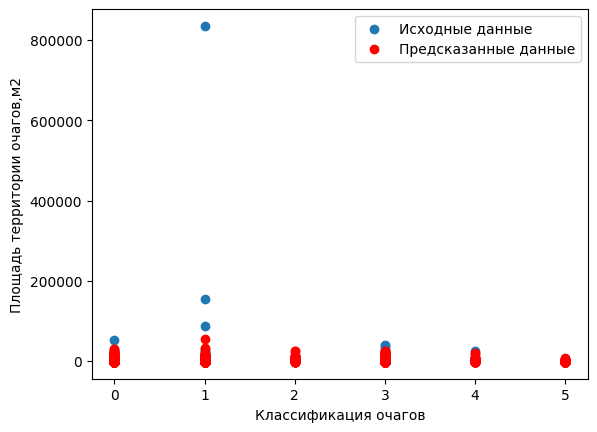

In [ ]:
Y_pred = model.predict(X_train)

# первый признак - Классификация очагов
plt.scatter(X_train[:,0], Y_train, label='Исходные данные')
plt.plot(X_train[:,0], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Классификация очагов')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()

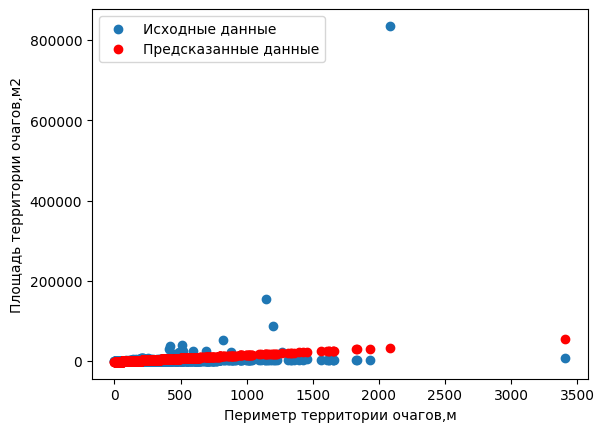

In [ ]:
# второй признак - Классификация очагов
plt.scatter(X_train[:,1], Y_train, label='Исходные данные')
plt.plot(X_train[:,1], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Периметр территории очагов,м')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()

In [ ]:
# rmse - sqrt(1 / n * sum(y_pred - y)^2)
# r2 - 1 - sum(y_pred - y)/sum(y_sred - y) коэффициент детерминации

# rmse -> 0
# r2 -> 1

# тестовая выборка
Y_pred_test = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2 = r2_score(Y_test, Y_pred_test)

print(f"rmse = {rmse}, r2 = {r2}")

rmse = 10838.057269046842, r2 = 0.22413877106382374


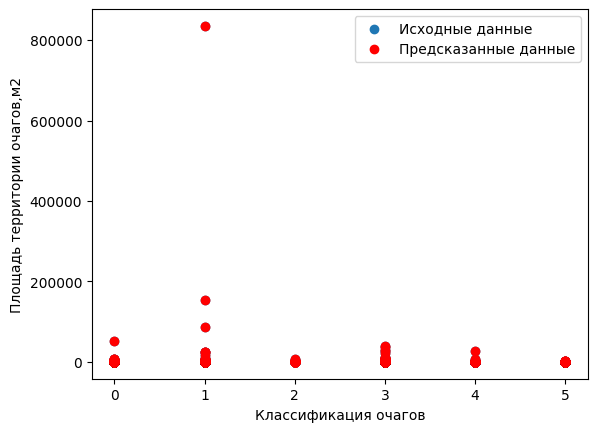

In [ ]:
# модель 2 - дерево принятия решений без параметров
model_tree = DecisionTreeRegressor()
model_tree = model_tree.fit(X_train, Y_train)

Y_pred = model_tree.predict(X_train)

# первый признак - Классификация очагов
plt.scatter(X_train[:,0], Y_train, label='Исходные данные')
plt.plot(X_train[:,0], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Классификация очагов')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()
# модель переобучена

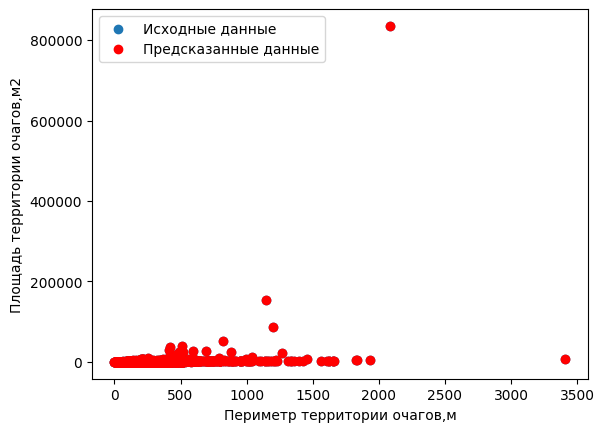

In [ ]:
# второй признак - Классификация очагов
plt.scatter(X_train[:,1], Y_train, label='Исходные данные')
plt.plot(X_train[:,1], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Периметр территории очагов,м')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()

In [ ]:
# модель 2 - дерево принятий решений с ограничение по глубине

model_tree = DecisionTreeRegressor(max_depth=5)
model_tree = model_tree.fit(X_train, Y_train)

In [ ]:
# делаем предсказание
model_tree.predict(X_train)

array([  83.3305007 ,   83.3305007 ,   83.3305007 , ..., 1021.95105064,
         83.3305007 ,   83.3305007 ])

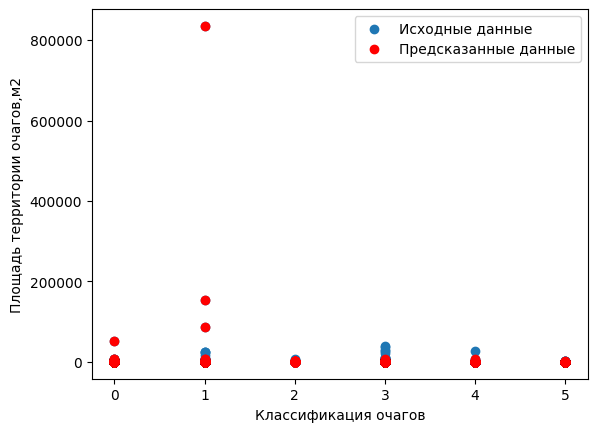

In [ ]:
Y_pred = model_tree.predict(X_train)

# первый признак - Классификация очагов
plt.scatter(X_train[:,0], Y_train, label='Исходные данные')
plt.plot(X_train[:,0], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Классификация очагов')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()

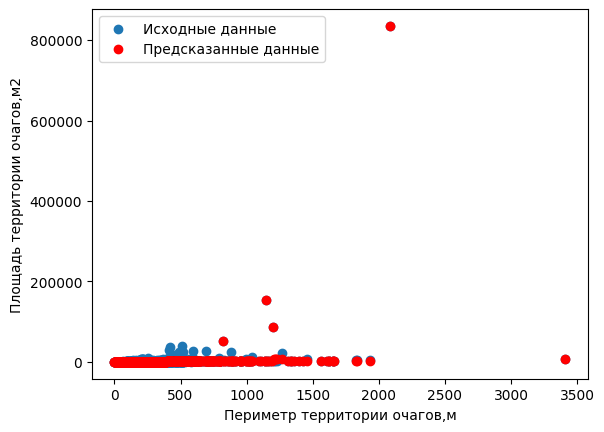

In [ ]:
# второй признак - Классификация очагов
plt.scatter(X_train[:,1], Y_train, label='Исходные данные')
plt.plot(X_train[:,1], Y_pred, 'ro', label='Предсказанные данные')
plt.xlabel('Периметр территории очагов,м')
plt.ylabel('Площадь территории очагов,м2')
plt.legend()
plt.show()

In [ ]:
# тестовая выборка
Y_pred_test = model_tree.predict(X_test)
rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_test))
r2 = r2_score(Y_test, Y_pred_test)

print(f"rmse = {rmse}, r2 = {r2}")

rmse = 49635.896926922425, r2 = -15.27319823967644


Для данного датасет лучшей стала модель линейной регресии